### 1.参数获取

In [6]:
import json

# 打开json文件 获取参数
with open('config.json', 'r') as f:
    config = json.load(f)
    print("config get success !")

# 读取参数
market_config = config['market_config']
grid_config = config['grid_config']

# 打印参数
print(market_config.keys())
print(grid_config.keys())


config get success !
dict_keys(['url', 'api_key', 'currency', 'code', 'start', 'end'])
dict_keys(['lower_bound', 'upper_bound', 'num_grids', 'leverage', 'investment', 'mode'])


### 2.数据获取

In [ ]:
from src.market_data import MarketData

market_data = MarketData(market_config)
prices, timestamps = market_data.fetch_real_data()

print("Prices:", prices[:5])
print("Timestamps:", timestamps[:5])

Prices: [55343.9, 56543.7, 56670.1, 57457.6, 59621.9]
Timestamps: [1725811200000, 1725897600000, 1725984000000, 1726070400000, 1726156800000]


### 3.网格策略

网格价格 [2200.0, 2206.9503629557753, 2213.9226838866493, 2220.917032163484, 2227.933477376302, 2234.972089334978, 2242.032938069936, 2249.11609383284, 2256.221627097301, 2263.349608559572, 2270.500109139254, 2277.673199980002, 2284.868952450231, 2292.087438143827, 2299.32872888086, 2306.592896708298, 2313.8800139007235, 2321.190152961053, 2328.5233866212575, 2335.879787843089, 2343.2594298188023, 2350.6623859718857, 2358.088729957792, 2365.53853566467, 2373.011877214098, 2380.508828961827, 2388.0294654985146, 2395.5738616504696, 2403.142092480396, 2410.734233288142, 2418.350359611444, 2425.990547226685, 2433.654872149642, 2441.343410636247, 2449.056239183343, 2456.7934345294484, 2464.555073655514, 2472.341233785698, 2480.151992388125, 2487.9874271756644, 2495.8476161066997, 2503.732637385903, 2511.6425694650184, 2519.5774910436357, 2527.5374810699786, 2535.522618741689, 2543.5329835066127, 2551.5686550635933, 2559.6297133632625, 2567.716238608836, 2575.8283112569134, 2583.9660120182753, 2

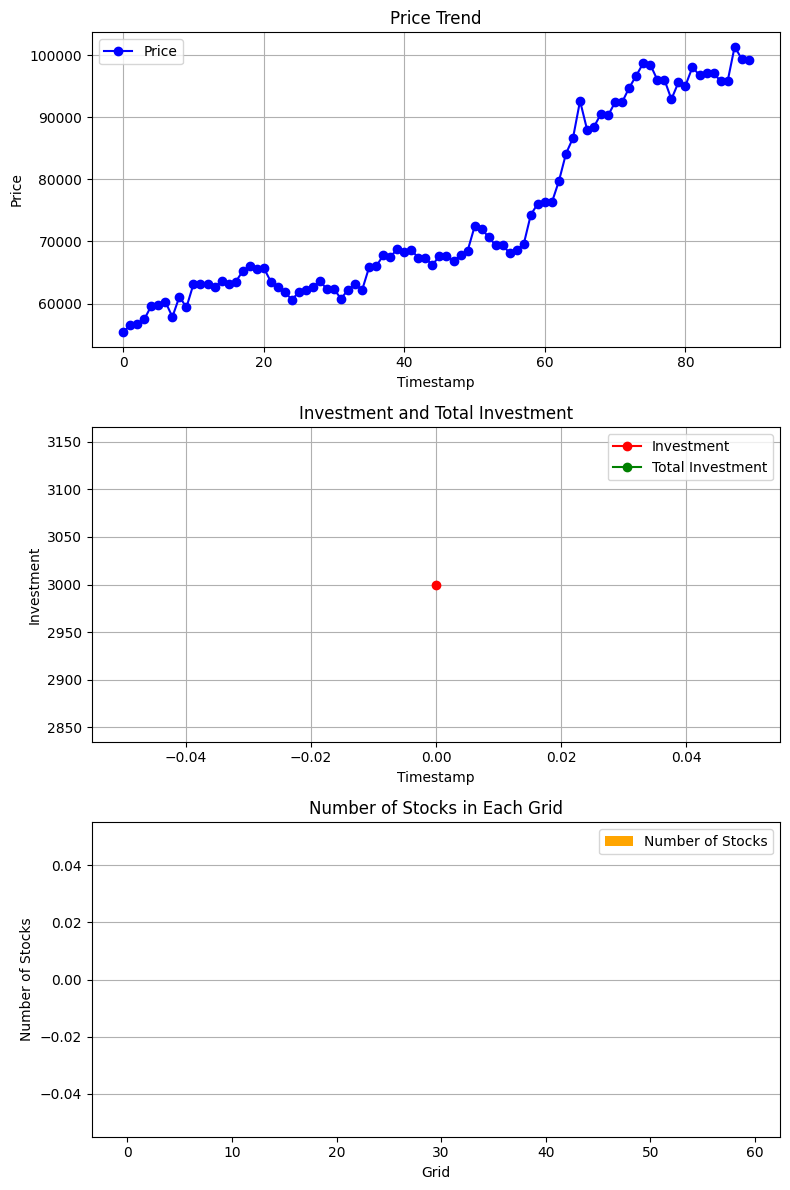

In [3]:
from src.grid_calculator import GridCalculator

grid_calc = GridCalculator(grid_config, prices)
grid_calc.generate_grid()

print("开始交易")
grid_calc.run()

grid_calc.conclusion()

### 4.可视化模型